In [2]:
import numpy as np
import pandas as pd
from data import constants
from mathutil import comp, percentage
from plotutil import periodictable

In [3]:
df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
cr_bro = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining - Chromyl\Results.xlsx")
df = pd.concat([df, cr_bro])

df["Group"] = df["Group"].astype(str)
# dataset = df.loc[(df["Type"] == "Corrole") & (df["Class"] != "Corrole")]
dataset = df.loc[(df["Type"] != "Porphyrin")]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
# dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "%"] = df[col].abs()/sum
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\comp.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + " comp"] = __compValue(df[col+"1"], df[col + "2"])
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

1336

In [39]:
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
import matplotlib
import seaborn as sns
! pip install SciencePlots

In [5]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"

C:\Users\jenso\AppData\Local\Temp/ipykernel_27900/3150847172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["x"] = np.abs(dataset[f"{mode}1"])
C:\Users\jenso\AppData\Local\Temp/ipykernel_27900/3150847172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["y"] = np.sign(dataset[f"{mode}1"]) * dataset[f"{mode}2"]
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[Text(0, 0, 'Ti (n = 3)'),
 Text(0, 1, 'V (n = 2)'),
 Text(0, 2, 'Cr (n = 15)'),
 Text(0, 3, 'Mn (n = 64)'),
 Text(0, 4, 'Fe (n = 116)'),
 Text(0, 5, 'Co (n = 121)'),
 Text(0, 6, 'Ni (n = 138)'),
 Text(0, 7, 'Cu (n = 114)'),
 Text(0, 8, 'Zn (n = 33)')]

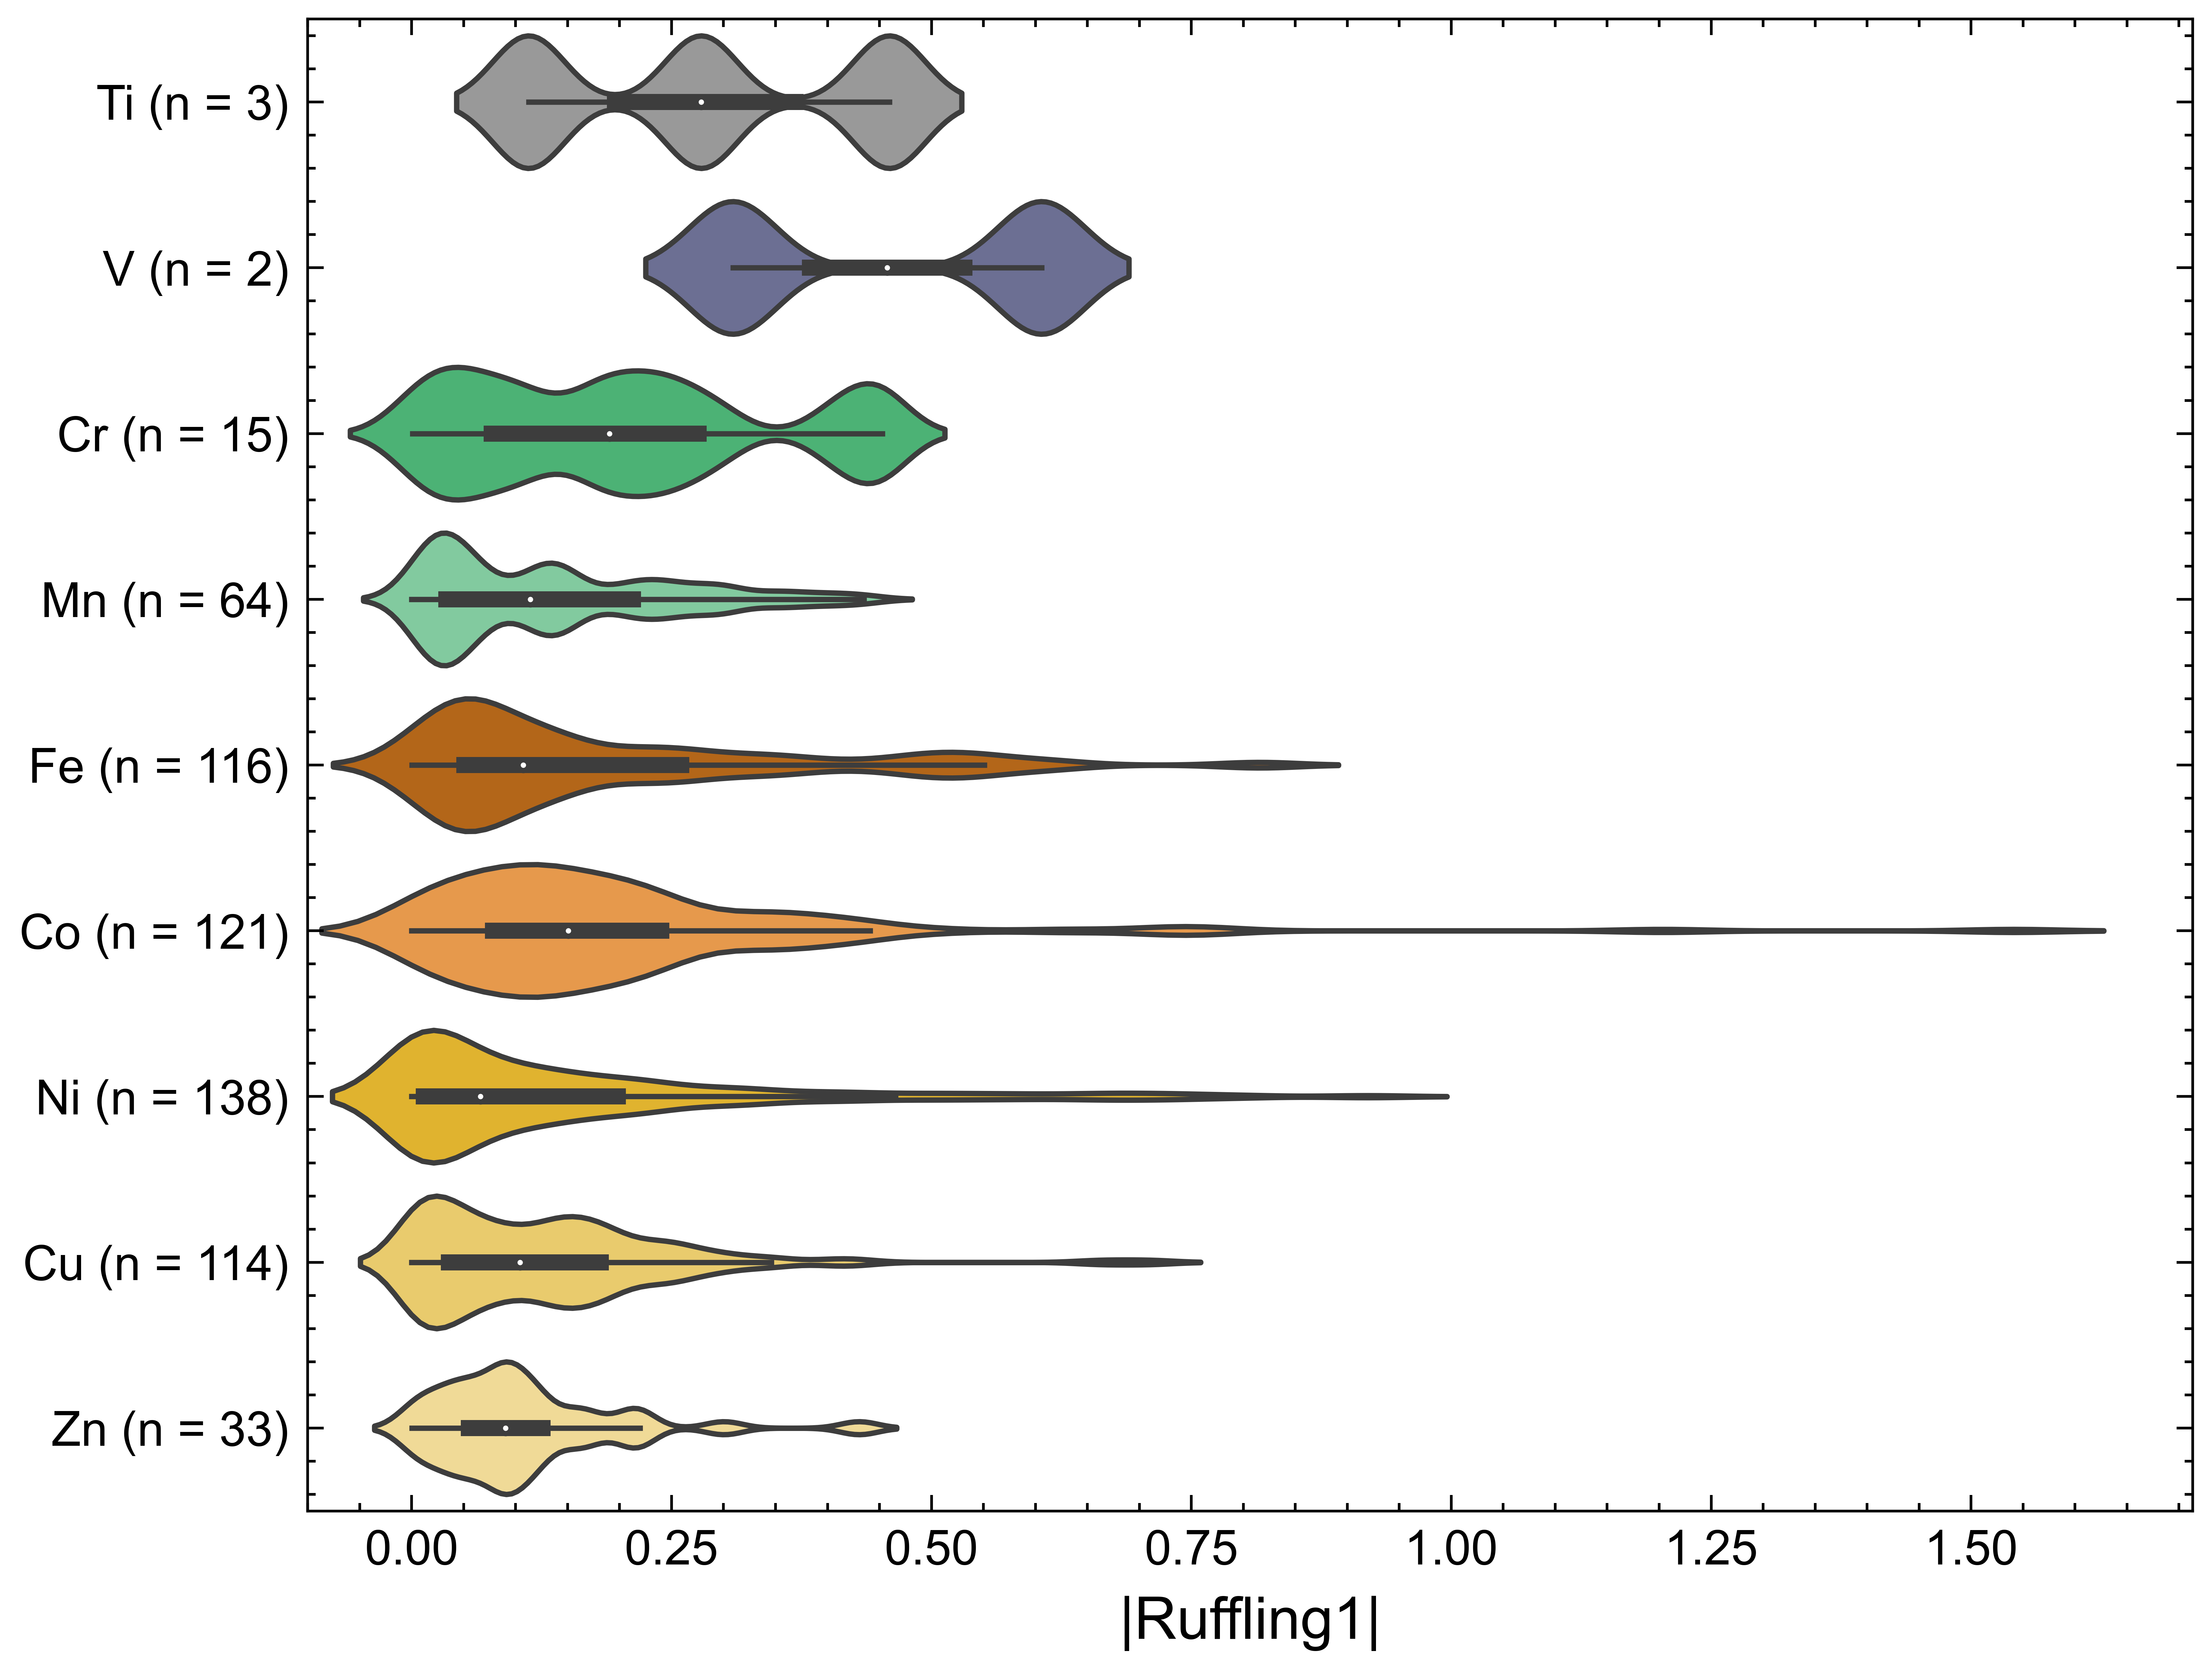

In [106]:
m3d = periodictable.m3d.copy()
m3d.remove("Sc")
mode = "Ruffling"
dataset["x"] = np.abs(dataset[f"{mode}1"])
dataset["y"] = np.sign(dataset[f"{mode}1"]) * dataset[f"{mode}2"]
sub_data = dataset.loc[dataset["Metal"].isin(m3d)]
sub_data.Metal = sub_data.Metal.astype("category")
sub_data.Metal = sub_data.Metal.cat.set_categories(m3d)
sub_data.sort_values("Metal", inplace=True)
ax = sns.violinplot(data=sub_data, y="Metal", x="x", bw=0.2, scale="width", palette=constants.colors_classes)
# sns.swarmplotdata=sub_data, y="Metal", x="x", alpha=0.25, color="k", size=2)
ax.set_xlabel(f"|{mode}1|")
ax.set_ylabel("")
ax.set_xlim(-.1)
ticklabels = []
for m in m3d:
    count = sub_data.loc[sub_data["Metal"] == m].shape[0]
    ticklabels.append(f"{m} (n = {count})")
ax.set_yticklabels(ticklabels)